# European Bank Dataset

In [78]:
import imblearn

# 1. Data Importing and Pre-processing

In [79]:
# First we import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [80]:
eurobank = pd.read_csv("C:\\Users\\Mohamed Ashfak\\OneDrive - NTT\\Desktop\\project\\bank-full 2.csv")


In [81]:
eurobank.head(50)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [82]:
print(eurobank.shape)

(45211, 17)


Further examination yields that most of the columns (variables) presented herein are objects, as stated explicitly by the datatypes call on the "eurobank" data frame (eurobank.dtypes). These objects are categorical variables. Only six out of seventeen columns are presented numerically as integers (int64). Only one other numerical variable is presented as a floating number with two decimal places (float64).

In [83]:
eurobank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [84]:
eurobank.rename({'y':'deposit'},axis=1,inplace=True)

In [85]:
eurobank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

C:\Users\Mohamed Ashfak\OneDrive - NTT\Documents\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

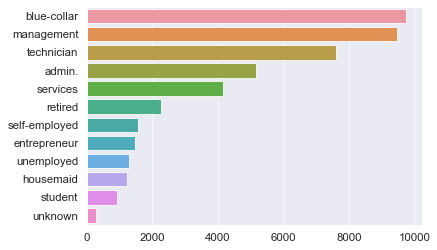

In [86]:

    sns.barplot(eurobank['job'].value_counts().values, eurobank['job'].value_counts().index)
    

In [87]:
eurobank['age'].value_counts(dropna=False)

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [88]:
eurobank.dropna(subset=['default', 'contact'], inplace=True)                  
eurobank['age'].fillna(int(eurobank['age'].median()), inplace=True)

In [89]:
eurobank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
# Reducing redundant data and performing need based discretization
 We determine that several of the following variables are of no consequence to the marketing campaign's efficacy. 
For example, the housing ,default,and loan variables pertain to binary loan categories and are redundant because they are essentially reporting the same metrics. Whether a person has a loan at a bank or if it is tied to housing does not have any bearing or impact on this particular marketing outreach. There is enough information to move forward with establishing relationships between variables. Similarly, the contact variable is omitted because the contact method (cellular, telephone, and unknown) does not provide much relevant information. Day and month would present some interesting findings. However, since this dataset is explicitly between the range of years 2008 - 2010, these parameters are not well-defined to provide which year they belong to; hence, we omit them from the model. Lastly, 'pdays', and 'previous' refer to contact tracing via the number of days. This exercise aims to establish the outcome of the marketing campaign via demographic representation, outreach, and subscription to the product. Thus, the following relevant columns are included in a new subset to help achieve this goal.



In [90]:
cols_to_include = ['age', 'job','marital', 'education', 'default', 'balance', 'duration', 'campaign', 'poutcome','deposit']

eurobank2 = eurobank[cols_to_include]
eurobank2.head()


,age,job,marital,education,default,balance,duration,campaign,poutcome,deposit
0,58,management,married,tertiary,no,2143,261,1,unknown,no
1,44,technician,single,secondary,no,29,151,1,unknown,no
2,33,entrepreneur,married,secondary,no,2,76,1,unknown,no
3,47,blue-collar,married,unknown,no,1506,92,1,unknown,no
4,33,unknown,single,unknown,no,1,198,1,unknown,no


In [91]:
#Deposit By Age
eurobank.deposit.value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

In [92]:

    bins = [18, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75] 
    names = ['18-20', '25', '30', '35', '40', \
            '45', '50', '55', '60', '65', '70', '75', '75+']
    
   
    d = dict(enumerate(names, 1))
    eurobank2['Age Range'] = np.vectorize(d.get)(np.digitize(eurobank2['age'],bins))


C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_18096/4122654711.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eurobank2['Age Range'] = np.vectorize(d.get)(np.digitize(eurobank2['age'],bins))


<AxesSubplot:xlabel='Age Range', ylabel='count'>

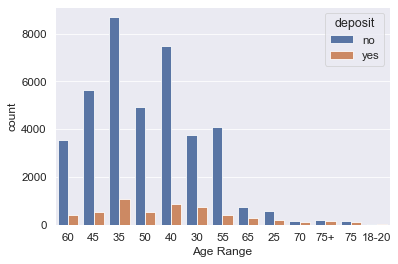

In [93]:
sns.countplot(x=eurobank2['Age Range'],hue=eurobank2['deposit'])

In [94]:
deposit_yes = eurobank2.loc[eurobank2.deposit == 'yes'].groupby(['Age Range'])[['deposit']].count()
deposit_yes.rename(columns={'deposit':'Deposit'}, inplace=True)

deposit_no = eurobank2.loc[eurobank2.deposit == 'no'].groupby(['Age Range'])[['deposit']].count()
deposit_no.rename(columns={'deposit':'No Deposit'}, inplace=True)

In [95]:
deposit_yes

,Deposit
Age Range,
18-20,18
25,189
30,721
35,1052
40,861
45,543
50,520
55,403
60,382


In [96]:
deposit_no

,No Deposit
Age Range,
18-20,29
25,573
30,3743
35,8688
40,7488
45,5642
50,4950
55,4085
60,3540


In [97]:
merged_df = pd.concat([deposit_yes, deposit_no], axis = 1)

In [98]:
merged_df

,Deposit,No Deposit
Age Range,,
18-20,18,29
25,189,573
30,721,3743
35,1052,8688
40,861,7488
45,543,5642
50,520,4950
55,403,4085
60,382,3540


In [99]:
merged_df['Deposit'] = merged_df['Deposit'].fillna(0)
merged_df['No Deposit'] = merged_df['No Deposit'].fillna(0)
merged_df
#max = merged_df.max()
#print(max)

,Deposit,No Deposit
Age Range,,
18-20,18,29
25,189,573
30,721,3743
35,1052,8688
40,861,7488
45,543,5642
50,520,4950
55,403,4085
60,382,3540


In [100]:
max = merged_df.max()
print(max)

Deposit       1052
No Deposit    8688
dtype: int64


In [101]:
print("\033[1m"+'Deposit Outcome by Age (Maximum Values):'+"\033[1m")

merged_df.loc['Total'] = merged_df.sum(numeric_only=True, axis=0)
merged_df['% of Deposits'] = round((merged_df['Deposit'] / (merged_df['Deposit'] \
                                                                + merged_df['No Deposit']))* 100, 2)
merged_df


Deposit Outcome by Age (Maximum Values):


,Deposit,No Deposit,% of Deposits
Age Range,,,
18-20,18,29,38.30
25,189,573,24.80
30,721,3743,16.15
35,1052,8688,10.80
40,861,7488,10.31
45,543,5642,8.78
50,520,4950,9.51
55,403,4085,8.98
60,382,3540,9.74


In [102]:
def deposit_by_age():
    return merged_df
deposit_by_age()

,Deposit,No Deposit,% of Deposits
Age Range,,,
18-20,18,29,38.30
25,189,573,24.80
30,721,3743,16.15
35,1052,8688,10.80
40,861,7488,10.31
45,543,5642,8.78
50,520,4950,9.51
55,403,4085,8.98
60,382,3540,9.74


In the accompanying table, deposit outcome is examined by age group.
Whereas clients between the ages of30-35 made 1052 deposits, the subscription rate is only 11%. 
The highest percent of deposits in any age group are equal for 75+ year olds, tying them both at a 44% subscription rate. 
Given larger numbers of customers in these age brackets, this can very well change. However, targeted marketing for those age groups may prove beneficial.

In [103]:
print("\033[01m"+'Bank Balance Summary Statistics by Job:'+"\033[01m")

def summary_by_job():
    pd.options.display.float_format = '{:,.2f}'.format
    cols_to_include = ['age', 'job','marital', 'education', 'default', 'balance', 'duration',\
                       'campaign', 'poutcome','deposit']

    new = eurobank[cols_to_include]
    new = new.groupby('job')['balance'].agg(["mean", "median", "std", "min", "max"])
    new.loc['Total'] = new.sum(numeric_only=True, axis=0)
    column_rename = {'mean': 'Mean', 'median': 'Median','std': 'Standard Deviation',\
                     'min':'Minimum','max': 'Maximum'}
    dfsummary = new.rename(columns = column_rename)
    new
    return dfsummary

summary_by_job()

Bank Balance Summary Statistics by Job:


,Mean,Median,Standard Deviation,Minimum,Maximum
job,,,,,
admin.,"1,135.84",396.00,"2,641.96","-1,601.00","64,343.00"
blue-collar,"1,078.83",388.00,"2,240.52","-8,019.00","66,653.00"
entrepreneur,"1,521.47",352.00,"4,153.44","-2,082.00","59,649.00"
housemaid,"1,392.40",406.00,"2,984.69","-1,941.00","45,141.00"
management,"1,763.62",572.00,"3,822.97","-6,847.00","102,127.00"
retired,"1,984.22",787.00,"4,397.04","-1,598.00","81,204.00"
self-employed,"1,647.97",526.00,"3,684.26","-3,313.00","52,587.00"
services,997.09,339.50,"2,164.49","-2,122.00","57,435.00"
student,"1,388.06",502.00,"2,441.70",-679.00,"24,025.00"


Bank Balance Summary Statistics by Job:

The summary statistics table broken down by job type is presented above. While there are several ways to aggregate this data, looking at balances by job category sheds light on summary statistics like mean, median, and standard deviation. For example, clients that are retired exhibit the highest mean bank balance of 1,984.22. The next highest mean bank balance of 1,772.36 is for individuals who did not specify their career profiles (unknown). Whereas the third-highest recorded mean bank balance of 1,763.62 is for management professionals. Given that retirement income, visa vie savings generally produces larger bank balances, this make sense contextually. On average, management professionals are higher wage earners than hourly positions, larger bank balances make sense for this sample as well. The interesting finding here is that blue-collar workers recorded lower average bank balances (1,078.83) than those that are unemployed (1,521.75). The same job category rankings are shown for median recorded bank balances, but the balances themselves are all below 1,000.00.

The highest standard deviation is that of 4,397.04 for retired individuals, suggesting that it is dispersed over a wider range of values and further away from the mean. This makes sense because tracking retirement income, generally speaking, casts a wide net over an abstract group of individuals. Similar assertions can be made about entrepreneurs to capture a broad category; their standard deviation is recorded as 4,153.44.

In [104]:
#Bank Balance Summary Statistics by Marital Status:

In [105]:
print("\033[1m"+'Bank Balance Summary Statistics by Marital Status:'+"\033[1m")

def summary_by_marital():
    pd.options.display.float_format = '{:,.2f}'.format
    new2 = eurobank2.groupby('marital')['balance'].agg(["mean", "median", "std", "min", "max"])
    new2.loc['Total'] = new2.sum(numeric_only=True, axis=0)
    column_rename = {'mean': 'Mean', 'median': 'Median','std': 'Standard Deviation',\
                         'min':'Minimum','max': 'Maximum'}
    dfsummary2 = new2.rename(columns = column_rename)
    return dfsummary2
    
summary_by_marital()

Bank Balance Summary Statistics by Marital Status:


,Mean,Median,Standard Deviation,Minimum,Maximum
marital,,,,,
divorced,"1,178.87",348.00,"2,926.45","-4,057.00","66,721.00"
married,"1,425.93",477.00,"3,140.96","-6,847.00","98,417.00"
single,"1,301.50",437.00,"2,875.32","-8,019.00","102,127.00"
Total,"3,906.30","1,262.00","8,942.73","-18,923.00","267,265.00"


The summary statistics of bank balances by marital status show that married individuals have the highest average bank balance. In contrast, individuals who are single have the second-highest average bank balance. Divorced couples are shown as having the lowest average bank balance, perhaps in part due to income loss from legal filings, paperwork, and attorney fees. Ranking information (highest to lowest) for median bank balances is the same; however, the balances themselves are lower. Whereas married couples show the highest average bank balances, the mean (standard deviation) variance is also the highest in this category.



In [106]:
#Deposit Outcome by Marital Status:

In [107]:
print("\033[1m"+'Deposit Outcome by Marital Status:'+"\033[1m")

def deposit_by_marital():
    marital_status_yes = eurobank2.loc[eurobank2.deposit == 'yes'].groupby\
    (['marital'])[['deposit']].count()
    marital_status_yes.rename(columns={'deposit':'Deposit'}, inplace=True)
    marital_status_no = eurobank2.loc[eurobank2.deposit == 'no'].groupby\
    (['marital'])[['deposit']].count()
    marital_status_no.rename(columns={'deposit':'No Deposit'}, inplace=True)
    merged_df = pd.concat([marital_status_yes, marital_status_no], axis = 1)
    merged_df.loc['Total'] = merged_df.sum(numeric_only=True, axis=0)
    merged_df['# of Clients'] = merged_df.sum(axis=1)
    merged_df['% Deposited'] = round((merged_df['Deposit'] / (merged_df['Deposit'] \
                                                              + merged_df['No Deposit']))* 100, 2)
    return merged_df.style.format("{:,.0f}")

deposit_by_marital()

Deposit Outcome by Marital Status:


,Deposit,No Deposit,# of Clients,% Deposited
marital,,,,
divorced,622,"4,585","5,207",12
married,"2,755","24,459","27,214",10
single,"1,912","10,878","12,790",15
Total,"5,289","39,922","45,211",12


The table above illustrates deposits by marital status. In examining this data, one must consider what all of this means from a marketing perspective. Each campaign has its unique premise for onboarding new clients to higher-tier services and offerings; hence this is why large conglomerate banks have promotional offers visa vie sales calls, pamphlets, and other promotional materials. In this case, the outcome of a successful campaign is that of a customer making a deposit.

Furthermore, it becomes apparent that the highest recorded deposits come from married clients (2,755), but even a larger ( 24,459) share of non-deposits also come from married clients. Only 10% of married clients subscribed to this marketing campaign, the lowest subscription rate by marital status category. Divorced customers, the lowest count of all marital categories, came in second with an overall 12% subscription rate. Single clients subscribed at the highest rate of 15% by making 1,912 deposits. There were only 12,790 single clients, which is why this metric was higher than the rest. All in all, 12% (counted as 5,289) of all 45,211 clients made a deposit, thereby subscribing to this marketing campaign.



# 2. Data Analysis and Visualization

#Identifying categorical, ordinal, and numerical variables within data

Upon further examination of the dataset once again in its entirety, it is apparent that each variable (column) has its unique characteristics in terms of type. For example, whereas age, balance, duration, campaign, pdays, and previous are numerical variables, some are not. To this point, job, marital, education, default, housing, loan, contact, poutcome, and deposit are categorical variables. Month, on the other hand, though categorical at first glance, is truly an ordinal variable, as it follows a strict order. To aide in the determination of each, 'eurobank.dtypes', and 'eurobank.head()' functions were already run in the prior section.

In [108]:
eurobank2.describe()

,age,balance,duration,campaign
count,"45,211.00","45,211.00","45,211.00","45,211.00"
mean,40.94,"1,362.27",258.16,2.76
std,10.62,"3,044.77",257.53,3.10
min,18.00,"-8,019.00",0.00,1.00
25%,33.00,72.00,103.00,1.00
50%,39.00,448.00,180.00,2.00
75%,48.00,"1,428.00",319.00,3.00
max,95.00,"102,127.00","4,918.00",63.00


In [109]:
summary_stats = round(eurobank2.describe().T,2)
summary_stats.drop(['count'], axis=1, inplace=True)
summary_stats.rename (columns={'mean':'Mean', 'std': 'Standard Deviation', 'min': 'Minimum', \
                               '25%':'Q1', '50%': 'Median', '75%':'Q3', 'max':'Maximum'}, inplace=True)
summary_stats

,Mean,Standard Deviation,Minimum,Q1,Median,Q3,Maximum
age,40.94,10.62,18.00,33.00,39.00,48.00,95.00
balance,"1,362.27","3,044.77","-8,019.00",72.00,448.00,"1,428.00","102,127.00"
duration,258.16,257.53,0.00,103.00,180.00,319.00,"4,918.00"
campaign,2.76,3.10,1.00,1.00,2.00,3.00,63.00


<AxesSubplot:xlabel='marital', ylabel='count'>

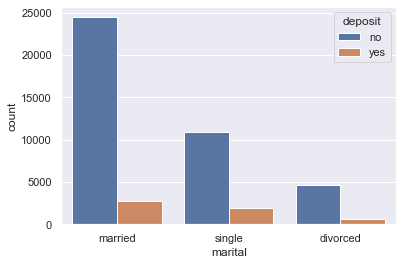

In [110]:
sns.set_theme(style="darkgrid")
sns.countplot(x="marital",hue="deposit",data=eurobank)


<AxesSubplot:xlabel='education', ylabel='count'>

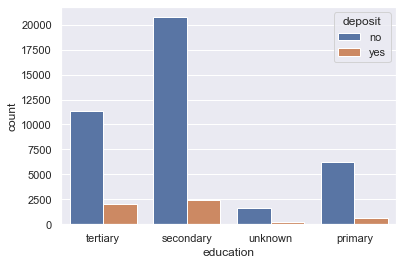

In [111]:
sns.countplot(x="education",hue="deposit",data=eurobank)


# Providing measures of centrality and distribution with visualizations

We examine the age distribution visually as a boxplot, and though it is normally distributed, it is skewed to the right.

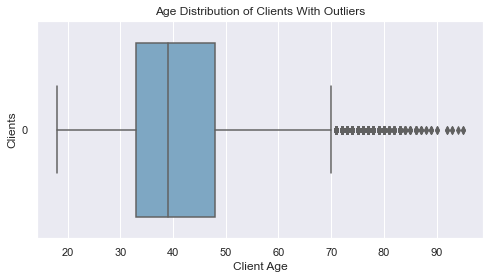

The first quartile is 33.0. 
The third quartile is 48.0. 
The IQR is 15.0.
The mean is 40.94.
The standard deviation is 10.62.
The median is 39.0.


In [112]:
# Boxplot of age as another way of showing distribution
fig = plt.figure(figsize = (8,4))
plt.title ('Age Distribution of Clients With Outliers')
plt.xlabel('Client Age')
plt.ylabel('Clients')

sns.boxplot(data=eurobank2['age'], palette="PuBu", orient='h')
plt.show()

# Computing IQR
Q1 = eurobank2['age'].quantile(0.25)
Q3 = eurobank2['age'].quantile(0.75)
IQR = Q3-Q1

# Computing Summary Statistics
mean_1 = round(eurobank2['age'].mean(),2)
std_1 = round(eurobank2['age'].std(),2)
median_1 = round(eurobank2['age'].median(),2)
print('The first quartile is %s. '%Q1)
print('The third quartile is %s. '%Q3)
print('The IQR is %s.'%IQR)
print('The mean is %s.'%mean_1)
print('The standard deviation is %s.'%std_1)
print('The median is %s.'%median_1)

In [113]:
lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)

outliers_eurobank2 = eurobank2.loc[(eurobank2['age'] < lower_bound) | (eurobank2['age'] > upper_bound)]
average_age = round(eurobank2.age.mean(), 2)
print('The average of age in the original data frame is %s.' % average_age)

average_age_outliers_eurobank2 = round(outliers_eurobank2.age.mean(),2)
print('The average of age of outliers is %s.' % average_age_outliers_eurobank2)

The average of age in the original data frame is 40.94.
The average of age of outliers is 76.82.


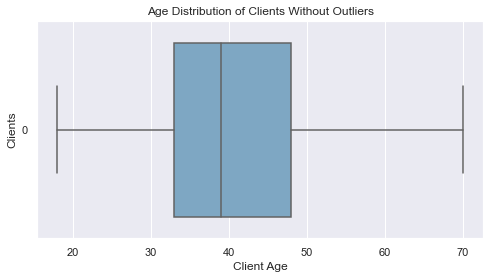

,Mean,Standard Deviation,Minimum,Q1,Median,Q3,Maximum
age,40.55,9.98,18.00,33.00,39.00,48.00,70.00
balance,"1,345.34","2,983.22","-8,019.00",71.00,442.00,"1,408.00","102,127.00"
duration,257.37,257.43,0.00,103.00,179.00,318.00,"4,918.00"
campaign,2.77,3.11,1.00,1.00,2.00,3.00,63.00


In [114]:
# Boxplot of age without outliers as another way of showing distribution
fig = plt.figure(figsize = (8,4))
plt.title ('Age Distribution of Clients Without Outliers')
plt.xlabel('Client Age')
plt.ylabel('Clients')
sns.boxplot(data=eurobank2['age'], palette="PuBu", orient='h', showfliers = False)
plt.show()

filter = (eurobank2['age'] >= Q1 - 1.5 * IQR) & (eurobank2['age'] <= Q3 + 1.5 *IQR)
summary_stats_2 = round(eurobank2.loc[filter].describe().T,2)
summary_stats_2.drop(['count'], axis=1, inplace=True)
summary_stats_2.rename (columns={'mean':'Mean', 'std': 'Standard Deviation', 'min': 'Minimum', \
                                 '25%':'Q1', '50%': 'Median', '75%':'Q3', 'max':'Maximum'}, inplace=True)
summary_stats_2

In [137]:
# Computing Means, Standard Deviations, and Observing Differences
mean_2 = round(eurobank2.loc[filter]['age'].mean(),2)
mean_difference = round((mean_1 - mean_2),2)
std_2 = round(eurobank2.loc[filter]['age'].std(),2)
std_difference = round((std_1 - std_2),2)
median_2 = round(eurobank2.loc[filter]['age'].median(),2)
median_difference = round((median_1 - median_2),2)

print('The mean age without outliers is %s.'%mean_2)
print('The standard deviation of the age variable without outliers is %s.'%std_2)
print('The median age without outliers is %s.'%median_2)

print("\n")

print('The difference between the mean with outliers and the \
mean without outliers is %s.'%mean_difference)
print('The difference between the standard deviation with outliers and the \
standard deviation without outliers is %s.'%std_difference)
print('The difference between the median with outliers and the \
median without outliers is %s.'%median_difference)

The mean age without outliers is 40.55.
The standard deviation of the age variable without outliers is 9.98.
The median age without outliers is 39.0.


The difference between the mean with outliers and the mean without outliers is 0.39.
The difference between the standard deviation with outliers and the standard deviation without outliers is 0.64.
The difference between the median with outliers and the median without outliers is 0.0.


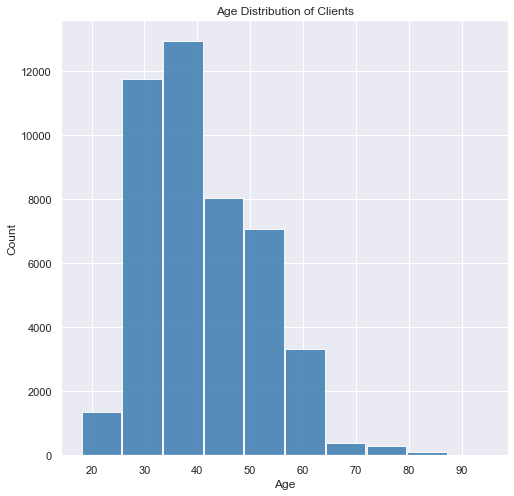

The information below shows the mode for the age variable:


0    32
dtype: int64

In [116]:
# Plotting a histogram to show distribution
fig = plt.figure(figsize = (8,8))
plt.hist(eurobank['age'], bins=10, color='steelblue', alpha=0.9, rwidth=.97)
plt.title ('Age Distribution of Clients')
plt.xlabel('Age') 
plt.ylabel('Count')
plt.show()

# mode = eurobank2.mode('age', numeric_only=True)
# print('The mode is %s.'%mode)

print('The information below shows the mode for the age variable:')
eurobank.loc[:,'age'].mode()

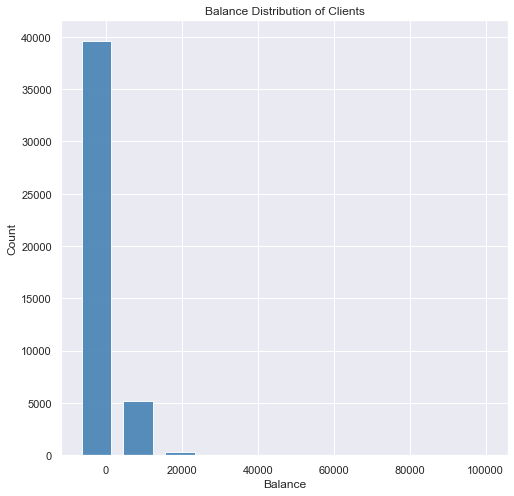

The following values represent the number of data points between each bin:
[39587  5233   294    58    21     7     6     1     2     2]


In [117]:
# Plotting a histogram to show distribution
fig = plt.figure(figsize = (8,8))
plt.hist(eurobank2['balance'], bins=10, color='steelblue', alpha=0.9, rwidth=0.7)
plt.title ('Balance Distribution of Clients')
plt.xlabel('Balance') 
plt.ylabel('Count')
plt.show()

print('The following values represent the number of data points between each bin:')

counts, bin_edges = np.histogram(eurobank2['balance'], bins=10)
print(counts)


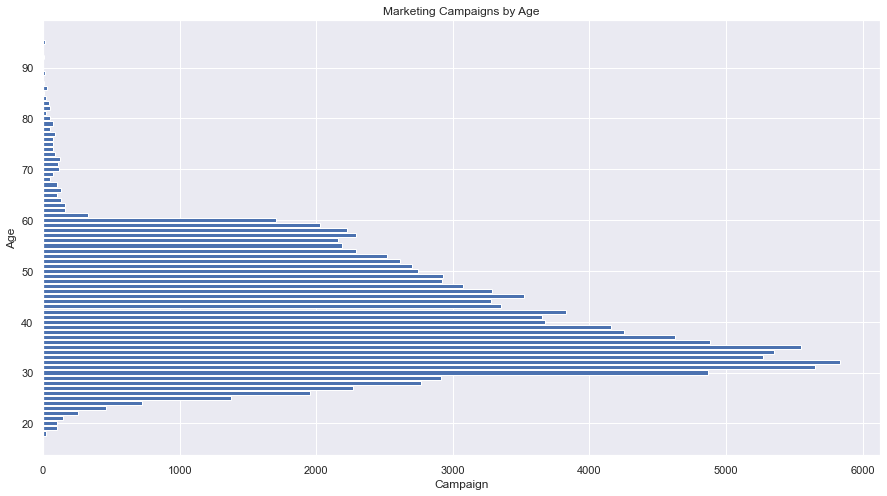

In [118]:
campaign_age = eurobank2.groupby('age', as_index=False)['campaign'].sum()
fig = plt.figure(figsize = (15,8))
plt.barh(campaign_age['age'], campaign_age['campaign'])
plt.xlabel("Campaign")
plt.ylabel("Age")
plt.title("Marketing Campaigns by Age")
plt.show()

In [119]:
eurobank2['deposit'] = eurobank2.deposit.map(dict(yes=1, no=0))
eurobank2['poutcome'] = eurobank2.poutcome.map(dict(unknown=0, other=1, failure=2, success=3))


C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_18096/991368702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eurobank2['deposit'] = eurobank2.deposit.map(dict(yes=1, no=0))
C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_18096/991368702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eurobank2['poutcome'] = eurobank2.poutcome.map(dict(unknown=0, other=1, failure=2, success=3))


In [120]:
eurobank2.head()

,age,job,marital,education,default,balance,duration,campaign,poutcome,deposit,Age Range
0,58,management,married,tertiary,no,2143,261,1,0,0,60
1,44,technician,single,secondary,no,29,151,1,0,0,45
2,33,entrepreneur,married,secondary,no,2,76,1,0,0,35
3,47,blue-collar,married,unknown,no,1506,92,1,0,0,50
4,33,unknown,single,unknown,no,1,198,1,0,0,35


Next, we examine correlations visually:

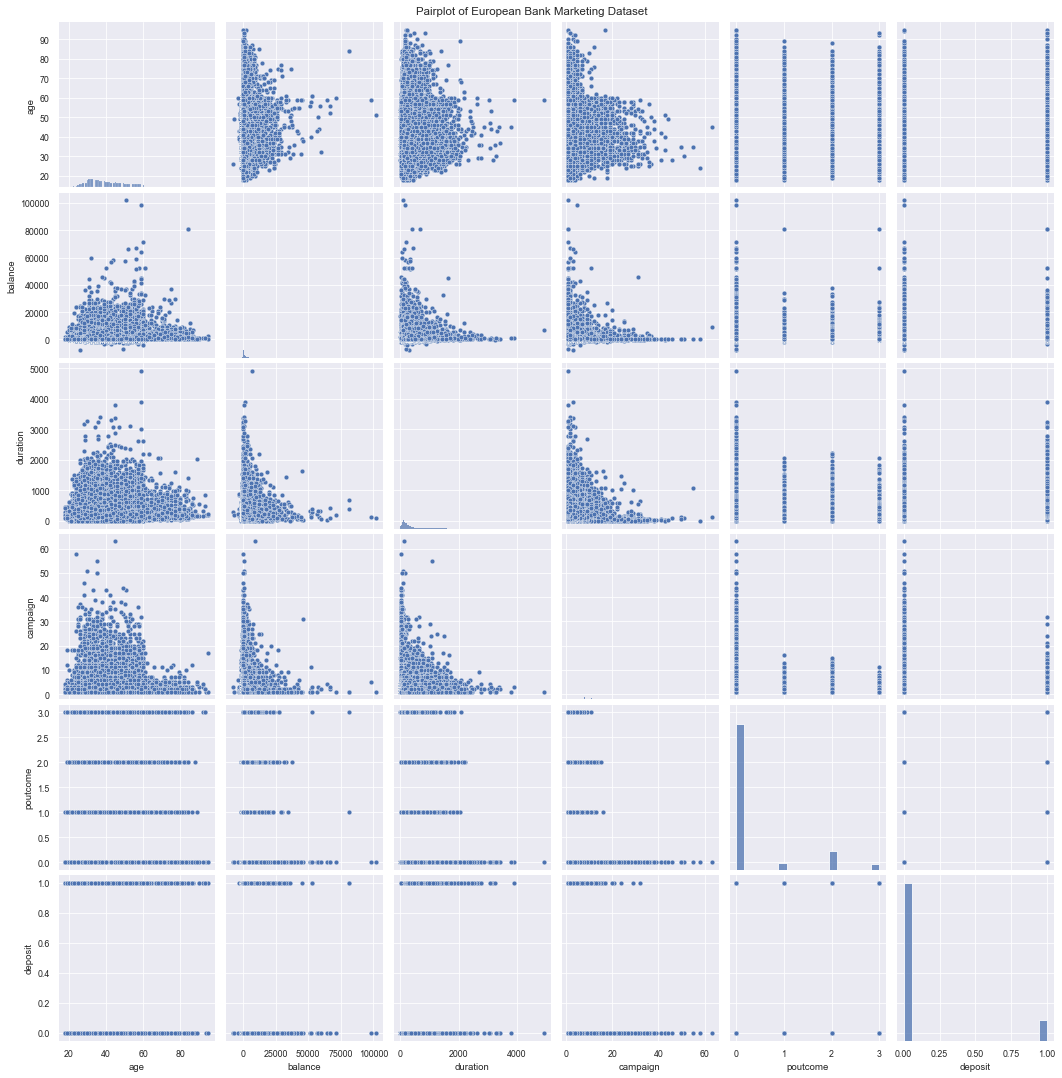

In [121]:
sns.set_context("paper", font_scale=1)
plot = sns.pairplot(eurobank2, diag_kind='hist', dropna = True, palette='Blues')
plot.fig.suptitle("Pairplot of European Bank Marketing Dataset", y = 1.0001) 
plt.show()

# Diagnosing for correlations between variables and determining independent and dependent variables

At first glance it does not appear that any of these variables have any noticeable degrees of correlation. Therefore, a heatmap correlation with indices is produced below:

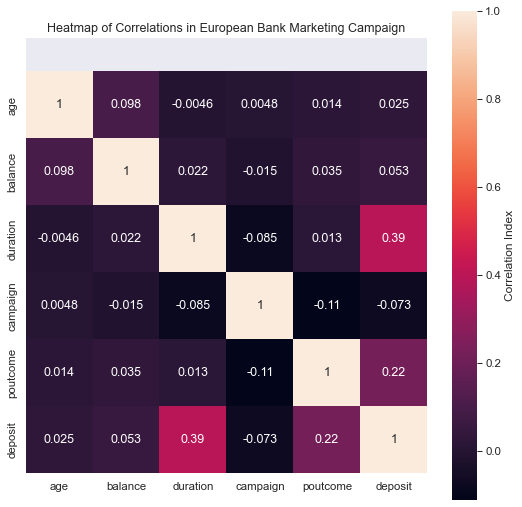

In [122]:
# Examining the correlations between variables using a heat map
heatmap = eurobank2[['age','balance','duration','campaign','poutcome','deposit']]
sns.set_context("paper", rc={"axes.labelsize":12}, font_scale = 1.3)
correlations = heatmap.corr()
plt.figure(figsize = (9,9))
ax = sns.heatmap(correlations[['age','balance','duration','campaign','poutcome', 'deposit']], \
                 annot = True, square = True, cbar_kws={'label': 'Correlation Index'})
ax.set_title('Heatmap of Correlations in European Bank Marketing Campaign')
ax.set_ylim(len(correlations), -0.5)
plt.show()

# 3. Data Analytics

Determining the need for a supervised or unsupervised learning method and identifying dependent and independent variables
In looking at linear regression as a potential model for this dataset, a determination is made that this model holds little to no merit for its weak variable associations (relationships). Therefore, the eurobank dataset requires a logistic regression model to make predictions based on the current variables. This is an example of supervised learning.

Since the marketing strategy focused on who opened an account and made an initial deposit, the analysis requires changing the outputs from yes and no to 1 and 0. Additionally, it will need dummy variables to help the program understand the categorical data. After the data preprocessing, the program will split the data into train and test sets to identify accuracy. Not all the variables will be selected for the final model, so the analysis will use the Recursive Feature Elimination (REF) method to reduce the number of variables.

The final portion of the analysis will show the final model, the model's accuracy, and a confusion matrix for the overall performance of the model.

In [124]:
# Change yes and no answers from deposit variable (column) to 0(no) and 1(yes) for linear regression
eurobank['deposit'] = eurobank.deposit.map(dict(yes=1, no=0))

In [125]:
eurobank2.head()

,age,job,marital,education,default,balance,duration,campaign,poutcome,deposit,Age Range
0,58,management,married,tertiary,no,2143,261,1,0,0,60
1,44,technician,single,secondary,no,29,151,1,0,0,45
2,33,entrepreneur,married,secondary,no,2,76,1,0,0,35
3,47,blue-collar,married,unknown,no,1506,92,1,0,0,50
4,33,unknown,single,unknown,no,1,198,1,0,0,35


In [126]:
#drop marital and contact columns
eurobank.drop(['marital'],axis=1, inplace=True)
eurobank.drop(['contact'],axis=1, inplace=True)
eurobank.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,0
1,44,technician,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,0
4,33,unknown,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,0


In [127]:
eurobank[['default','housing','loan']]=eurobank[['default','housing','loan']].replace(["yes","no"],["1","0"])
eurobank['month']=eurobank['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
eurobank['job']=eurobank['job'].replace(['unknown'],['other'])

eurobank.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,tertiary,0,2143,1,0,5,5,261,1,-1,0,unknown,0
1,44,technician,secondary,0,29,1,0,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,0,2,1,1,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,0,1506,1,0,5,5,92,1,-1,0,unknown,0
4,33,other,unknown,0,1,0,0,5,5,198,1,-1,0,unknown,0


In [128]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
eurobank['job']=le.fit_transform(eurobank['job'])
eurobank['education']=le.fit_transform(eurobank['education'])
eurobank['poutcome']=le.fit_transform(eurobank['poutcome'])
eurobank.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,0
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,0
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,0
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,0
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,0


In [129]:
#remove outliers using z_score

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(eurobank[['age','balance','duration','campaign','pdays','previous']]))
print(z)
eurobank=eurobank[(z<3).all(axis=1)]
eurobank.shape

       age  balance  duration  campaign  pdays  previous
0     1.61     0.26      0.01      0.57   0.41      0.25
1     0.29     0.44      0.42      0.57   0.41      0.25
2     0.75     0.45      0.71      0.57   0.41      0.25
3     0.57     0.05      0.65      0.57   0.41      0.25
4     0.75     0.45      0.23      0.57   0.41      0.25
...    ...      ...       ...       ...    ...       ...
45206 0.95     0.18      2.79      0.08   0.41      0.25
45207 2.83     0.12      0.77      0.25   0.41      0.25
45208 2.93     1.43      3.37      0.72   1.44      1.05
45209 1.51     0.23      0.97      0.40   0.41      0.25
45210 0.37     0.53      0.40      0.25   1.48      4.52

[45211 rows x 6 columns]


(40209, 15)

C:\Users\Mohamed Ashfak\OneDrive - NTT\Documents\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


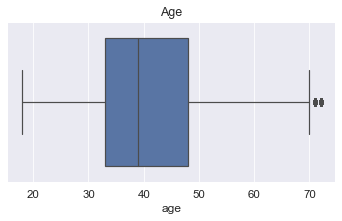

In [130]:
#checking outliers removed ot not
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(eurobank['age'])
plt.title("Age")
plt.show()

<AxesSubplot:xlabel='deposit', ylabel='count'>

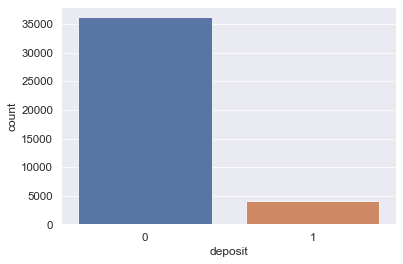

In [131]:
#seprating independent and dependent variable
x=eurobank.drop(['deposit'],axis=1) #contain all  independent variable
y=eurobank['deposit']           #dependent variable

#Handling imbalanced data
sns.countplot(x='deposit',data=eurobank)

In [132]:
#When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique.
#Random Over-Sampling
#Oversampling can be defined as adding more copies to the minority class.



In [133]:
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()
x_new,y_new=os.fit_resample(x,y)

Original dataset shape Counter({0: 36155, 1: 4054})
Resampled dataset shape Counter({0: 36155, 1: 36155})


C:\Users\Mohamed Ashfak\OneDrive - NTT\Documents\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deposit', ylabel='count'>

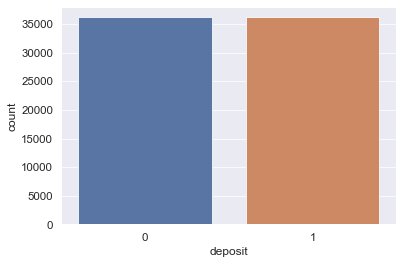

In [134]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new)

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.20,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

(57848, 14) (14462, 14) (57848,) (14462,)


ROC_AUC Score: 0.7934180658561018
[[5811 1336]
 [1659 5656]]


<AxesSubplot:>

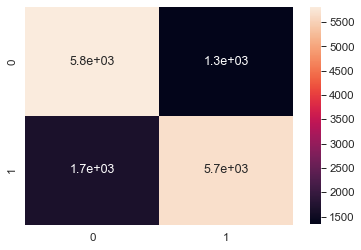

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score


model=LogisticRegression()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)

acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)

print("ROC_AUC Score:",AUC_LR)

cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True)